# The Effect of News Media and White House Sentiment on the Stock Market

#### Group 22 Julia Hoffman, Nikhil Pereira, Ryan Weiss
hjulia99@vt.edu, nikhil24@vt.edu, ryanw99@vt.edu

# Qualititative Section Step 1

#### Questions, problem, hypothesis, claim, context, motivation
#### Definitions, data, methods to be used
#### Rationale, assumptions, biases

# Step 1. Define the Problem

### Problem Statement

The gatekeepers of American information should be selective in what they say to the public, because their words can have a significant impact on the economy. Fluctuations in the stock market are common after certain articles and tweets reach Wall Street and the general public. While key information is sometimes the cause of these changes in the market, it's often the sentiment that has the most profound impact, and this can be carefully crafted through specific language. With social media, including Twitter, having grown tremendously over the past decade, the effect of tweets on the direction of the market has simultaenously grown, and now is a crucial time to study these effects.

Additionally, with the COVID-19 situation being so new, there is not much research on how different sentiment has affected the stock market during this pandemic. Looking at those tweets have the largest effect on indexes like the DOW Jones Index and the S&P 500 is important in determining economic influence. This involves not only individuals like the president, but news organizations like Fox News, CNN, and MSCNB. Further, an analysis of these tweets and headlines can help influential people and organizations determine what language tends to have positive or negative effects on the market, providing useful guidance for future crises.

### Problem Description

This project will analyze the relationship between how the White House and the media portray COVID-19 updates and the stock market. Because these sources are the gatekeepers of information to the American people, they have a significant impact on the economy. Currently, Twitter is the #1 news app on the app store, suggesting that this cite is where many citizens obtain their information. Tweets will be gathered and analyzed from Donald Trump, CNN, FoxNews, and MSNBC for sentiment. In addition, data from the DOW Jones Index and the S&P 500 will be used to track the stock market. This is a significant project because if successful, it can inform the American public about how negative or positive headlines could be directly effecting their livelihood. It will also suggest to gatekeepers to think twice about their sentiment before publishing a Tweet.

### Driving Research Questions

What is the effect of the White House and media sentiment on the stock market? Which gatekeeper has the larger effect on the stock market (S&P 500 and DOW Jones)? How should the American public and investors respond to news from each of the gatekeepers in the future? Is one gatekeeper causing more damage to the US Economy than others?

# Quantitative Section Steps 2-5

#### Data processing, analysis, visualization
#### Documented code and results
#### Summary visuals

# Step 2. Collecting Data

### Data Gathering and Processing

Detailed Description of Data

Data is collected from yahoo finance and Twitter to later be analyzed for a relationship between news media/White House sentiment and the stock market. The python module yfinance is used to obtain the opening and closing price of the DOW Jones Index and the S&P 500 Index. We plan to focus our analysis on 10 days prior to the crash and 10 days post crash in March 2020.The DOW and S&P charts show evidence that there was a steep crash in March 2020. As for the Twitter data, tweepy is used to access tweets from Trump, CNN, Fox News, and MSNBC. Six csvs are going to be generated, two for financial data and four for each Twitter user.

In [ ]:
pip install yfinance

In [ ]:
pip install yahoofinancials

### Annotated Code for Financial Data

In [149]:
# Annotated Code for Financial Data

from pandas_datareader import data
# Getting Dow Jones and S&P 500 data
dow = data.DataReader('DJIA', start = '2019-11-17', end='2020-04-19', data_source='yahoo')
sp = data.DataReader('^GSPC', start = '2019-11-17', end='2020-04-19', data_source='yahoo')
dow['Date']=dow.index
sp['Date']=sp.index

In [4]:
# Importing API to access Twitter data 
import pandas as pd
import tweepy
import json
import pandas

# Function to read the key file and load keys in a dictionary
def loadKeys(key_file):
    with open('keys.json') as f:
        key_dict = json.load(f)
    return key_dict['api_key'], key_dict['api_secret'], key_dict['token'], key_dict['token_secret']

# Authenticate using oAuthHandler
KEY_FILE = 'keys2.json'
api_key, api_secret, token, token_secret = loadKeys(KEY_FILE)
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(token, token_secret)
api = tweepy.API(auth)

### Function to Get User Data from All Twitter Users

In [5]:
from collections import defaultdict #Import a dictionary data structure to parse the twitter object Record Set

def get_user_data(username, numiterations,countTweet): #Function takes in the user number of tweets to 
    dataframe = pandas.DataFrame() #Create an empty dataframe
    user_tweets = api.user_timeline(username, count = countTweet, exclude_replies = True, include_rts = False) #Call the Twttier API
    user_dict = defaultdict(list) #Create an empty dictionary
    lastTweet = user_tweets[-1] #Retrieve the last ID in the Record Set
    newID = lastTweet.id #Store the last tweets ID
    for i in range(numiterations): #Iterate n times to gather previous timeline data of user
        tweets = api.user_timeline(username, count = countTweet, max_id=newID, exclude_replies = True, include_rts = False) #Call API with the last ID from previous timeline
        for tweet in tweets: #Store the data from the API in a dictionary
            user_dict["Date"].append(tweet.created_at)
            user_dict["text"].append(tweet.text)
            user_dict["ID"].append(tweet.id)
            user_dict["Username"].append(username)
        userdf = pd.DataFrame(user_dict) #Convert the dictionary to a dataframe
        frame = pandas.concat([dataframe,userdf]) #Make a frame that concats the first set of data to the current frame userdf
        newID = str(userdf.iloc[-1, :]['ID']) #Update the newID variable
    return frame #return the frame


### Call the Function with the Twitter User News Platform

In [222]:
FoxFrame = get_user_data('FoxNews',2,125).drop_duplicates() #Retreiving FoxNews Data
FoxFrame

,Date,text,ID,Username
0,2020-04-14 14:28:40,https://t.co/54yHLm2ktQ,1250068460819939328,FoxNews
1,2020-04-14 13:42:37,https://t.co/HEEZtTtPJ3,1250056870632599558,FoxNews
2,2020-04-14 02:02:56,https://t.co/y6ICVXVFSz,1249880789719941120,FoxNews
3,2020-04-14 01:18:25,https://t.co/vnPv27vm1X,1249869585374994432,FoxNews
4,2020-04-13 23:58:39,https://t.co/8rN5D4VLux,1249849513067634689,FoxNews
5,2020-04-13 22:54:46,https://t.co/LQGn7KPkWZ,1249833436132622337,FoxNews
6,2020-04-13 21:23:37,https://t.co/ZLcBnSKWxW,1249810498675245056,FoxNews
7,2020-04-13 20:16:54,https://t.co/3DdMcs7Bpl,1249793708473581573,FoxNews
8,2020-04-13 18:21:25,https://t.co/W2wX5n8AEf,1249764646761922561,FoxNews
9,2020-04-13 17:05:39,https://t.co/12ea9fUcnR,1249745579619618816,FoxNews


In [225]:
CNNFrame = get_user_data('CNN',40,200).drop_duplicates() #Retreiving CNN News Data
CNNFrame

,Date,text,ID,Username
0,2020-04-27 20:31:04,Three families are suing a home for seniors in...,1254870701573537793,CNN
1,2020-04-27 20:21:05,Saudi Arabia is abolishing the death penalty f...,1254868192029220869,CNN
2,2020-04-27 20:17:21,The Beatles YouTube page invited fans from acr...,1254867249028108288,CNN
3,2020-04-27 20:13:29,"""I think the food supply chain is threatened i...",1254866278478606336,CNN
4,2020-04-27 20:12:04,Katie Coelho lost her 32-year-old husband to c...,1254865919131529219,CNN
5,2020-04-27 20:11:06,Michelle Obama has announced the release of a ...,1254865675652263936,CNN
6,2020-04-27 20:01:04,The chairman of the House Foreign Affairs Comm...,1254863153625628672,CNN
7,2020-04-27 19:51:04,"Greg Zanis, the Illinois man who for years has...",1254860636552523777,CNN
8,2020-04-27 19:41:06,"Airbus has placed more than 6,000 workers in t...",1254858127825973250,CNN
9,2020-04-27 19:31:10,The Pentagon has officially released three sho...,1254855626150121472,CNN


In [227]:
MSNBCFrame = get_user_data('MSNBC',50,100).drop_duplicates() #Retreiving MSNBC Data
MSNBCFrame

,Date,text,ID,Username
0,2020-04-28 05:05:06,President Trump to give West Point's commencem...,1255000063513751555,MSNBC
1,2020-04-28 04:46:01,Beto O'Rourke reacts to President Trump's exec...,1254995259475582976,MSNBC
2,2020-04-28 04:31:01,"WATCH: Executives from CVS, Walgreens, and Rit...",1254991487181471745,MSNBC
3,2020-04-28 04:14:04,"""It is a community filled with heroes,"" Rep. R...",1254987218336309248,MSNBC
4,2020-04-28 04:02:04,"Fmr. VP Gore: “On the way out of this crisis, ...",1254984201457336321,MSNBC
5,2020-04-28 03:29:03,.@curefinder says 'availability and rapidity o...,1254975891224100870,MSNBC
6,2020-04-28 03:01:07,WATCH: @GadiNBC reports from Colorado's JBS me...,1254968861495001088,MSNBC
7,2020-04-28 02:50:09,This week on #IntoAmerica: @trymainelee talks ...,1254966103333314561,MSNBC
8,2020-04-28 02:43:06,Gov. Lamont says the service economy in Connec...,1254964329490845696,MSNBC
9,2020-04-28 02:19:44,"""We've got to get through this in spite of Don...",1254958448548155393,MSNBC


In [228]:
TrumpFrame = get_user_data('realDonaldTrump',10,1000).drop_duplicates() #Retreiving Trump Data
TrumpFrame

,Date,text,ID,Username
0,2020-04-21 10:19:15,Watched the first 5 minutes of poorly rated Mo...,1252542407285055489,realDonaldTrump
1,2020-04-21 03:18:19,Great Alan. They are Fake News! https://t.co/n...,1252436473866973185,realDonaldTrump
2,2020-04-21 03:14:23,7 Devastating Revelations About Crossfire Hurr...,1252435487437938690,realDonaldTrump
3,2020-04-21 02:06:22,In light of the attack from the Invisible Enem...,1252418369170501639,realDonaldTrump
4,2020-04-21 02:02:12,.@MikeGarcia2020 will be a tremendous fighter ...,1252417320347033614,realDonaldTrump
5,2020-04-21 01:57:09,Tom Tiffany (@TomTiffanyWI) is a Great Advocat...,1252416049942687747,realDonaldTrump
6,2020-04-20 20:19:36,I will be having a White House Press Conferenc...,1252331100367663104,realDonaldTrump
7,2020-04-20 15:37:22,Last month all you heard from the Radical Left...,1252260073839177728,realDonaldTrump
8,2020-04-20 14:32:12,Received a very nice call from @GovTimWalz of ...,1252243673867313152,realDonaldTrump
9,2020-04-20 13:58:46,Congratulations to all of my many friends at T...,1252235263327125506,realDonaldTrump


### Summary of Data Collection Step 2

The Data Collection step was mostly successful. As a team we were able to get the Financial Data quickly and easily. For the Twitter data, we devised a useful method that would iterate through the user's timeline to retrieve as many posts as possible. The only drawback we had to the Twitter data was that many of the tweets containt URLs rather than actual text. The data will need to be cleaned in the next steps in order to continue the Data Process Pipeline

### Sample Sentiment Analysis on Trump Data to show project path

This is a sample 20 recent Tweets from Trump and we did a quick VADER sentiment analysis to show the direction of the project. This is a quick demonstration on how we will be doing Sentiment analysis on Twitter User Data before and after the stock market crash

In [235]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib
import matplotlib.pyplot as plt
import numpy

#read the file into dataframe. "header=0" means the first row will be considered as a header
##****** Make a dictionary and determine the data types correctly
frame = pd.read_csv("./TrumpTwitterData.csv", header=0, dtype={'date':str,"text":str,'id':str, 'Username':str})
analyzer = SentimentIntensityAnalyzer() #Store the sentiment variable
sentimentDict = defaultdict(list)
headframe = frame.head(20)
for sentence in headframe.text: #Compute the scores for each sentence in frame
    vs = analyzer.polarity_scores(sentence)
    sentimentDict["Negative Score"].append(vs['neg'])
    sentimentDict["Neutral Score"].append(vs['neu'])
    sentimentDict["Positive Score"].append(vs['pos'])
    sentimentDict["Compound Score"].append(vs['compound'])
frame2 = pd.DataFrame(sentimentDict)
userData = pd.concat([frame, frame2], axis=1, sort=False).drop(['Unnamed: 0','ID'],axis=1).iloc[0:20,:] #Concat the numeric and non-numeric data into one frame
score = userData.mean()
print(score)
userData

Negative Score    0.08950
Neutral Score     0.68055
Positive Score    0.22985
Compound Score    0.17657
dtype: float64


,Date,text,Username,Negative Score,Neutral Score,Positive Score,Compound Score
0,2020-04-13 01:16:50,I am working hard to expose the corruption and...,realDonaldTrump,0.167,0.722,0.110,0.1280
1,2020-04-13 00:51:35,Thank you Paris! https://t.co/hDUppWgIXA,realDonaldTrump,0.000,0.518,0.482,0.4199
2,2020-04-13 00:47:42,Thank you! https://t.co/z8dgzQxkVC,realDonaldTrump,0.000,0.417,0.583,0.4199
3,2020-04-13 00:38:34,I look forward to it also! https://t.co/IGZLBg...,realDonaldTrump,0.000,1.000,0.000,0.0000
4,2020-04-13 00:08:23,Great going Natalie! https://t.co/OldfyDdFRO,realDonaldTrump,0.000,0.406,0.594,0.6588
5,2020-04-12 22:51:33,"Sorry Fake News, it’s all on tape. I banned Ch...",realDonaldTrump,0.297,0.602,0.100,-0.5994
6,2020-04-12 22:21:49,Fake News! https://t.co/HzPQgbXgxX,realDonaldTrump,0.629,0.371,0.000,-0.5255
7,2020-04-12 21:43:10,"Governors, get your states testing programs &a...",realDonaldTrump,0.093,0.633,0.274,0.6476
8,2020-04-12 21:33:34,The Opposition Party (Lamestream Media) and th...,realDonaldTrump,0.000,0.870,0.130,0.4019
9,2020-04-12 20:43:12,"If the Fake News Opposition Party is pushing, ...",realDonaldTrump,0.125,0.766,0.109,-0.1027


### Save All Frames to CSV

In [230]:
FoxFrame.to_csv('ProjectData/FoxData.csv')
CNNFrame.to_csv('ProjectData/CnnData.csv')
MSNBCFrame.to_csv('ProjectData/MSNBCData.csv')
TrumpFrame.to_csv('ProjectData/TrumpTwitterData.csv')

# Step 3. Process Data

In this step of the data process pipeline we need to clean the URL type tweets and find the text. To do this we will perform a webscraping method that using BeautifulSoup and requests. We will be creating functions to convert the URLs into text that way we can analyze the type of links the different Users are sharing. Another cleaning step that we have to do is to reformat the Date Time Columns so that they are easier to read when we graph the data frames

### Cleaning the URL Tweets from Phase 1: Gathering Twitter Data 

In [231]:
#Imports vader sentiment analyzer, pandas, beautiful soup, and numpy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

# Importing tweet csvs as dataframes
trumpTweets = pd.read_csv('TrumpTwitterData.csv').drop('Unnamed: 0', axis=1)
cnnTweets = pd.read_csv('CnnData.csv').drop('Unnamed: 0', axis=1)
foxTweets = pd.read_csv('FoxData.csv').drop('Unnamed: 0', axis=1)
msnbcTweets = pd.read_csv('MSNBCData.csv').drop('Unnamed: 0', axis=1)

In [232]:
# Creating function to pull title of page from url 
def get_title(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'lxml')
    return soup.title.text

In [233]:
# Creating function to map the correct title to each tweet 
def title_cleaner(text):
    if 'https' in text[:5]:
        return(get_title(str(text)))
    else:
        return text 

In [234]:
# Converting urls into headline titles
foxTweets.text = foxTweets.text.map(title_cleaner)
cnnTweets.text = cnnTweets.text.map(title_cleaner)
msnbcTweets.text = msnbcTweets.text.map(title_cleaner)
trumpTweets.text = trumpTweets.text.map(title_cleaner)

### Re-formatting the Date Time Stamp using Time Series Objects

In [42]:
#Creating function to map the reformatted date to the date columns
def timeCleaner(date):
    string1 = pandas.to_datetime(date)
    string1 = string1.strftime('%B-%d-%Y')
    return string1

In [82]:
#Mapping the Date Column to that function
foxTweets.Date = foxTweets.Date.map(timeCleaner)
cnnTweets.Date = cnnTweets.Date.map(timeCleaner)
msnbcTweets.Date = msnbcTweets.Date.map(timeCleaner)
trumpTweets.Date = trumpTweets.Date.map(timeCleaner)
dow.Date=dow.Date.map(timeCleaner)
sp.Date=sp.Date.map(timeCleaner)

### Summary of the Data Processing Step 3
In this step we were able to clean the data by converting URLs into actual text and the date time object into a readable format. This cleaning step was crucial before moving on the future steps to visualize and analyze the data. Overall this step was fairly simple and only required a few functions because the API we used were good at returning clean data to begin with

# Step 4. Visualize the Data

### Visualizing Financial Data of the DOW and SAP from the Past 4 Months

We plan to focus our analysis on 10 days prior to the crash and 10 days post crash in March 2020.The DOW and S&P charts show evidence that there was a steep crash in March 2020. As for the Twitter data, tweepy is used to access tweets from Trump, CNN, Fox News, and MSNBC.

Text(0, 0.5, 'Price')

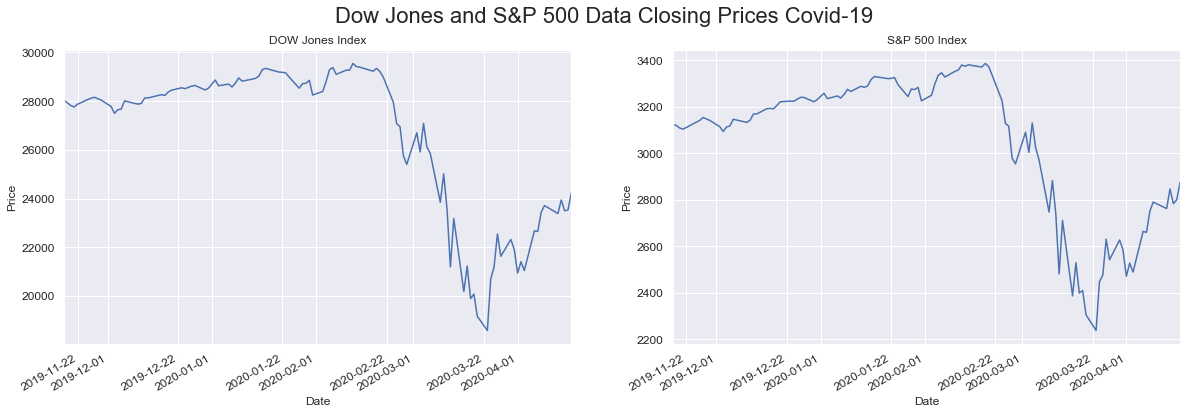

In [221]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

# # Making graph header 
f, (dowplot, spplot) = plt.subplots(1, 2, figsize=(20, 6))
f.suptitle('Dow Jones and S&P 500 Data Closing Prices Covid-19', fontsize=22)

# Plotting the closing prices 
dow.Close.plot(title = 'DOW Jones Index', ax = dowplot, fontsize=12)
dowplot.set_ylabel('Price')
sp.Close.plot(title = 'S&P 500 Index', ax = spplot, fontsize=12)
spplot.set_ylabel('Price')

These two line plots show the trend of the DOW Jones and S&P 500 over the past 5 months or time that COVID-19 became apparent. As one can see these two indexes were at their peak for December 2019 - February 2020 before COVID 19 began to have an effect on the market. The volatility and panic hit the United States in late February and this corresponds to the time the government imposed the national lockdown and news outlets were covering the pandemic

### Visualizing Trump Data through sample Sentiment Analysis

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Positive Score')

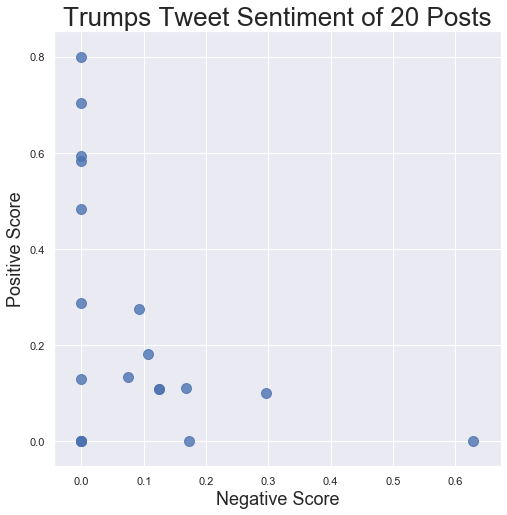

In [238]:
userData.Date = userData.Date.map(timeCleaner)
p = userData.plot.scatter(x='Negative Score', y='Positive Score',
                   s =100, #marker size to population but divide to make smaller and add constant
                   figsize=(8,8), #Make the figure size big enough
                   alpha=0.8, #between 0 (transparent) and 1 (opaque). 
                   sharex=False) # sharex = convinces xlabel to show
p.set_title('Trumps Tweet Sentiment of 20 Posts',fontsize=26) #Put a big title
p.set_xlabel("Negative Score", fontsize=18) #Put a x label
p.set_ylabel("Positive Score", fontsize=18) #Put a y label

### Trump's 20 Recent Post Sentiment

In this scatter plot we can see a quick visual on how Trump's last 20 posts have been more positive leaning than negative. This sort of preliminary conclusion shows that Trump has been optimistic amid the Pandemic (End of April) and that we can probably infer the same conclusion when looking at end of March data. This is a sample sentiment visual that can be done for all the Twitter users and to analyze how their Twitter behaviour has been fluctuating through the COVID Pandemic.

# Step 5. Analyze the Data

In this section we are going to use VADER sentiment analysis to examine the behaviour of the four Twitter users: MSNBC, CNN, FOX and realDonaldTrump. We want to understand their sentiment over the past few months so that we can determine which GateKeeper is having the greatest influence on the Stock Market. We are going to create a vader function to retrieve the scores and then combine all the data into one frame for analysis. Finally we will use a Bar Plot and Box Plot to visualize the summary statistics from the VADER sentiment analyzer.

### Analyzing Sentiment on Clean  Twitter Data

In [150]:
# The parameter is a csv file that's been read in using pandas, and has the tweet text in
# a column titled 'text'.
def vader_score_getter(data):

    # Creates empty lists for the VADER scores
    neg = []
    neu = []
    pos = []
    compound = []
    
    # Gets the VADER scores for each tweet and adds them to the respective lists.
    analyzer = SentimentIntensityAnalyzer()
    for line in data['text']:
        vs = analyzer.polarity_scores(line)
        neg.append(vs['neg'])
        neu.append(vs['neu'])
        pos.append(vs['pos'])
        compound.append(vs['compound'])
    
    # Adds the lists as columns to the dataframe
    data['VADER negative score'] = neg
    data['VADER neutral score'] = neu
    data['VADER positive score'] = pos
    data['VADER compound score'] = compound
    
    # Returns the new dataframe
    return data

### Call the Vader Score Getter for each Twitter User (Fox, CNN, MSNBC, Trump)

In [151]:
# Creating dataframe with positive, negative, and neutral sentiment of headline
foxData2 = vader_score_getter(foxTweets)
cnnData2 = vader_score_getter(cnnTweets)
msnbcData2 = vader_score_getter(msnbcTweets)
trumpData2 = vader_score_getter(trumpTweets)

### Combine all the sentiment and frames into one Data Frame for Plotting and Comparisons 

In [159]:
alldata = pd.concat([foxData2, cnnData2, msnbcData2, trumpData2]).reset_index().iloc[:, 1:]
alldata

,Date,text,ID,Username,VADER negative score,VADER neutral score,VADER positive score,VADER compound score
0,April-08-2020,Birx says government is classifying all deaths...,1247716461990359041,FoxNews,0.000,1.000,0.000,0.0000
1,April-08-2020,John Prine dead at age 73 from coronavirus com...,1247705685095264256,FoxNews,0.281,0.719,0.000,-0.6486
2,April-08-2020,Fauci says world may never return back to norm...,1247696951782584320,FoxNews,0.000,1.000,0.000,0.0000
3,April-08-2020,Truck driver opens up on personal sacrifice fo...,1247684643899539457,FoxNews,0.000,1.000,0.000,0.0000
4,April-07-2020,Coronavirus survivor who has lifelong lung con...,1247644682471047176,FoxNews,0.000,0.722,0.278,0.6124
5,April-07-2020,Acting Navy secretary resigns after criticizin...,1247630069595545601,FoxNews,0.286,0.714,0.000,-0.5859
6,April-07-2020,"Rand Paul recovers from coronavirus, tests neg...",1247562838455005184,FoxNews,0.291,0.709,0.000,-0.5719
7,April-07-2020,MLB says it discussed playing games at one sit...,1247551476756553731,FoxNews,0.000,0.920,0.080,0.1027
8,April-07-2020,Esper directed acting Navy secretary to apolog...,1247543556589436929,FoxNews,0.000,0.915,0.085,0.1027
9,April-07-2020,USNS Comfort crew member tests positive for co...,1247470533475794946,FoxNews,0.000,0.596,0.404,0.7269


###  Analyzing the Sentiment for the Twitter Users through Bar Chart and Box Plot
In this section of the data science experiment we are trying to visualize the VADER scores gathered in the alldata frame. By using the bar and box plots we can get visuals on how the sentiment of different Twitter users differ amid the Pandemic.

Text(0, 0.5, 'Sentiment Percentage of Tweet')

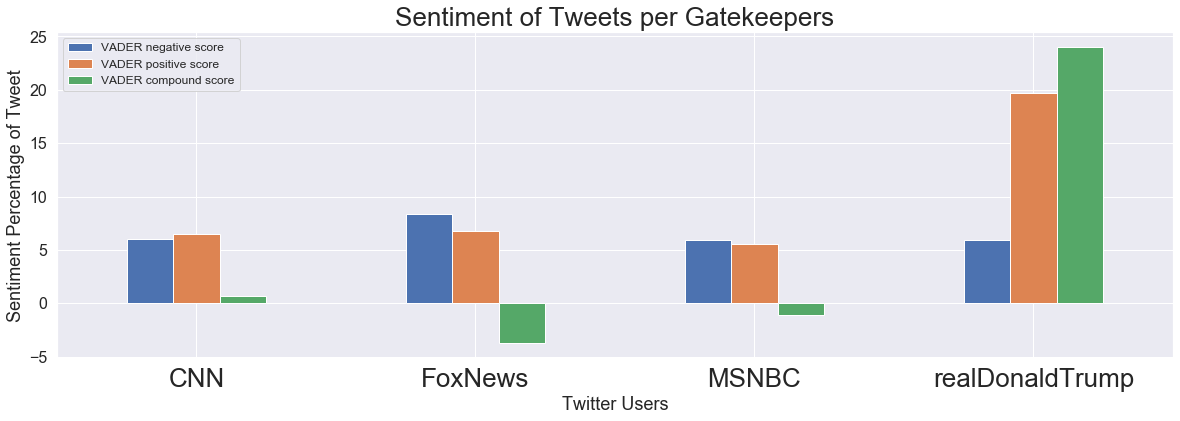

In [212]:
#Parallel plot to see the scores grouped by each subreddit
framePP = alldata.drop(['text','ID','Date','VADER neutral score'], axis=1).groupby('Username').mean()*100
plot = framePP.plot.bar(figsize=(20, 6))
plot.legend(loc=2, prop={'size': 12}) #Place a legend on the plot
for tick in plot.xaxis.get_major_ticks(): #Adjust the x axis labels by adjusting their size and orientation
                tick.label.set_fontsize(26) 
                tick.label.set_rotation('horizontal')
for tick in plot.yaxis.get_major_ticks(): #Adjust the y axis labels by adjusting their size
                tick.label.set_fontsize(16) 
plot.set_title('Sentiment of Tweets per Gatekeepers',fontsize=26) #Put a big title
plot.set_xlabel("Twitter Users", fontsize=18) #Put a x label
plot.set_ylabel("Sentiment Percentage of Tweet", fontsize=18) #Put a y label

Text(0, 0.5, 'Negative Sentiment Score')

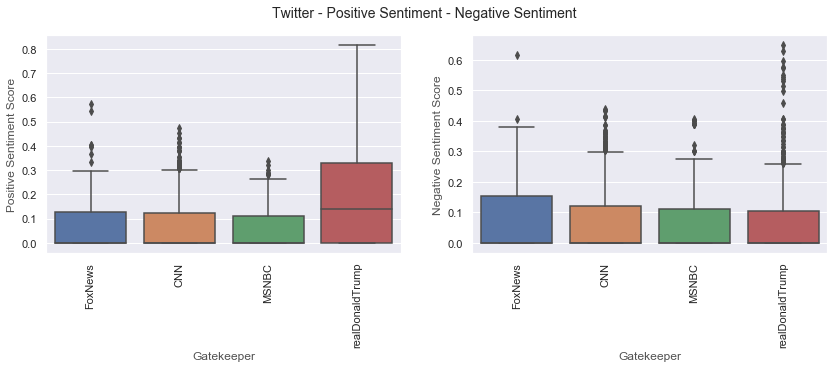

In [157]:
# Making box plot header 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Twitter - Positive Sentiment - Negative Sentiment', fontsize=14)

# Plotting positive sentiment scores per gatekeeper
sns.boxplot(x="Username", y="VADER positive score", data=alldata, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation='vertical')
ax1.set_xlabel("Gatekeeper",size = 12,alpha=0.8)
ax1.set_ylabel("Positive Sentiment Score",size = 12,alpha=0.8)

# Plotting negative sentiment scores per gatekeeper
sns.boxplot(x="Username", y="VADER negative score", data=alldata, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation='vertical')
ax2.set_xlabel("Gatekeeper",size = 12,alpha=0.8)
ax2.set_ylabel("Negative Sentiment Score",size = 12,alpha=0.8)


### Summary of Sentiment Graphs (Bar and Box Plots)
The bar plot above shows how the positive, negative and compound score compare for each Twitter User. From the graphs we can see that Donald Trump's Twitter has the most positive sentiment and compound score (single normalized score) whereas FoxNews has the most negative sentiment and compound score. We can also see that CNN and MSNBC are mostly neutral because their compound score hovers around 0. This graph give us a good insight on how these Twitter Users behaved over the last few months with the COVID-19 Pandemic. Note that VADER mostly categorized everyone's tweets as neutral but we are comparing just the postive and negative metrics to make better conclusions.

This box plot shows the variance of positive and negative sentiment between Tweets of each gatekeeper. Trump's tweets have the largest distribution of positive sentiment and the smallest distribution of negative sentiment with a few outliers. All three news outlets have relatively equal distributions for positive and negative sentiment suggesting that they are more neutral. Of the gatekeepers, FoxNews has the largest distribution of negative sentiment. 


###  Saving the new VADER data into CSV

In [239]:
# Cretaing csvs from dataframes
foxData2.to_csv('foxData2.csv')
cnnData2.to_csv('cnnData2.csv')
msnbcData2.to_csv('msnbcData2.csv')
trumpData2.to_csv('trumpData2.csv')

### Summary of Data Analysis Step 5
The analysis step was fairly successful. We were able to conclude that Donald Trump by far had the most positive sentiment in Tweets over the last few months whereas FoxNews had the most negative. CNN and MSNBC were mostly neutral because their compound score was around 0 on a scale from -1 to 1. 

TODO Phase 3: 
The next steps in the analysis is to visualize the sentiment of each Twitter user through the Pandemic weeks (End of February through Now) by grouping the tweet sentiments by weeks. Then we need to compare this plot with the Financial Stock trends to see if there is a relationship in up and downturns. Furhter analysis will be attempted in Phase 3 of the Project.

# Qualititative Section Step 6

# Step 6 Conclusions and Final Report

### TODO: Phase 3

# Credit Listing

Nikhil Pereira: Formatted the entire notebook to include Phase 1 Content and QQQ Format, Updated API Calls for better data and visualized the Trump Data Recent 20 Posts, Created Time formatting function and applied to Data Frames, Created the Sentiment Bar Plot, Annotated every section to include descriptions and summaries.

Julia Hoffman: Created Web Scraping Functions "getTitle" and "titleCleaner", Applied Web Scraping to Data Frames using BeautifulSoup module, Updated Financial API Call using Pandas Data Reader, Updated Financial Plots with Seaborn, Created Box Plot, Wrote a few descriptions.


Ryan Weiss: Created the Vader Score Function and applied it to all the Twitter User Data Frames.